# NLP Tutorial: Text Classification Using Spacy Word Embeddings
Problem Statement
Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

Fake news spreads faster than real news and creates problems and fear among groups and in society.

We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

Dataset
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

This data consists of two columns. - Text - label

Text is the statements or messages regarding a particular event/situation.

label feature tells whether the given text is Fake or Real.

As there are only 2 classes, this problem comes under the Binary Classification.

In [1]:
import pandas as pd 
df = pd.read_csv("Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
df.shape

(9900, 2)

In [5]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [6]:
df.columns


Index(['Text', 'label'], dtype='object')

In [14]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['label'].map({'Fake':0,'Real':1})
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


# Get spacy word vectors and store them in a pandas dataframe

In [9]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [11]:
doc = nlp("Top Trump Surrogate BRUTALLY Stabs Hi")
doc.vector.shape

(300,)

In [12]:
df['vector'] = df['Text'].apply(lambda x: nlp(x).vector)

In [13]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.vector.values,df.label_num,test_size=0.2,random_state=2022)

In [21]:
X_train

array([array([-2.37034578e-02,  1.48199528e-01, -5.90629913e-02, -3.08816023e-02,
               7.27375224e-02, -3.08532882e-02, -3.06985099e-02, -1.34581909e-01,
              -2.89440658e-02,  2.11217093e+00, -2.11404130e-01, -1.30848298e-02,
               9.76289958e-02, -8.72511789e-02, -1.27175421e-01, -7.87014738e-02,
              -4.45573106e-02,  8.96639585e-01, -7.74146467e-02, -1.98509209e-02,
              -4.66989167e-03,  3.00393123e-02, -5.44604585e-02, -3.01919542e-02,
               2.35033669e-02,  4.78319898e-02, -1.07414149e-01, -4.99117828e-04,
               6.58109086e-03, -7.65082892e-03,  2.21302323e-02,  3.81453149e-02,
               2.45294645e-02,  8.50784853e-02,  4.57540490e-02, -2.83517223e-02,
              -2.62076780e-02,  9.25419573e-03, -4.42117751e-02, -1.07683197e-01,
               9.35755111e-03,  6.35481179e-02,  5.63387387e-02, -6.61794245e-02,
               1.34266177e-02,  1.39213279e-02, -8.35610852e-02, -3.96741964e-02,
               2

In [22]:
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [23]:
X_test_2d

array([[-0.04045006,  0.15803917, -0.07007289, ..., -0.02070695,
        -0.03767742,  0.07828152],
       [-0.10133173,  0.15817572, -0.09110445, ..., -0.05770173,
         0.01264671,  0.05452826],
       [-0.08413067,  0.18664382, -0.01645634, ..., -0.05126239,
        -0.03087497, -0.00507031],
       ...,
       [-0.0646969 ,  0.13155003, -0.1018946 , ..., -0.06268797,
        -0.01129996,  0.0522517 ],
       [-0.0779852 ,  0.15085569, -0.06255803, ..., -0.04473808,
        -0.01742729,  0.04725816],
       [-0.06835494,  0.15212202, -0.04318341, ..., -0.07264125,
        -0.04558746,  0.06995795]], dtype=float32)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scaled_train_embed = scalar.fit_transform(X_train_2d)
scaled_test_embed =scalar.transform(X_test_2d)
clf = MultinomialNB()
clf.fit(scaled_train_embed,y_train)

MultinomialNB()

In [26]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [27]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(0.5, 47.7222222222222, 'Prediction')

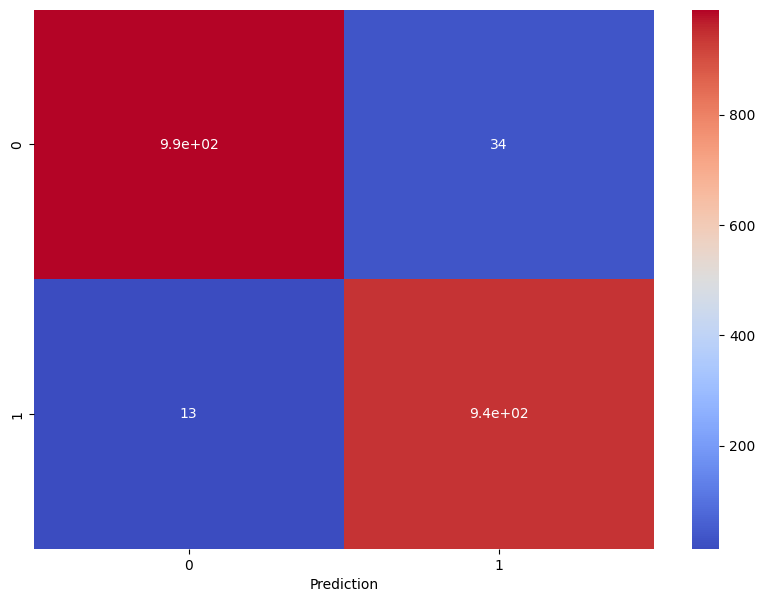

In [28]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, cmap='coolwarm',cbar=True)
plt.xlabel('Prediction')